In [2]:
import nltk

In [3]:
import random

In [4]:
from nltk.corpus import names

In [5]:
names.fileids()

['female.txt', 'male.txt']

In [6]:
import matplotlib

In [7]:
import matplotlib.pyplot as plt

In [8]:
matplotlib.style.use("ggplot")

In [9]:
%matplotlib inline

In [10]:
name_cfd = nltk.ConditionalFreqDist((fileid,name[-2])for fileid in names.fileids() for name in names.words(fileid))

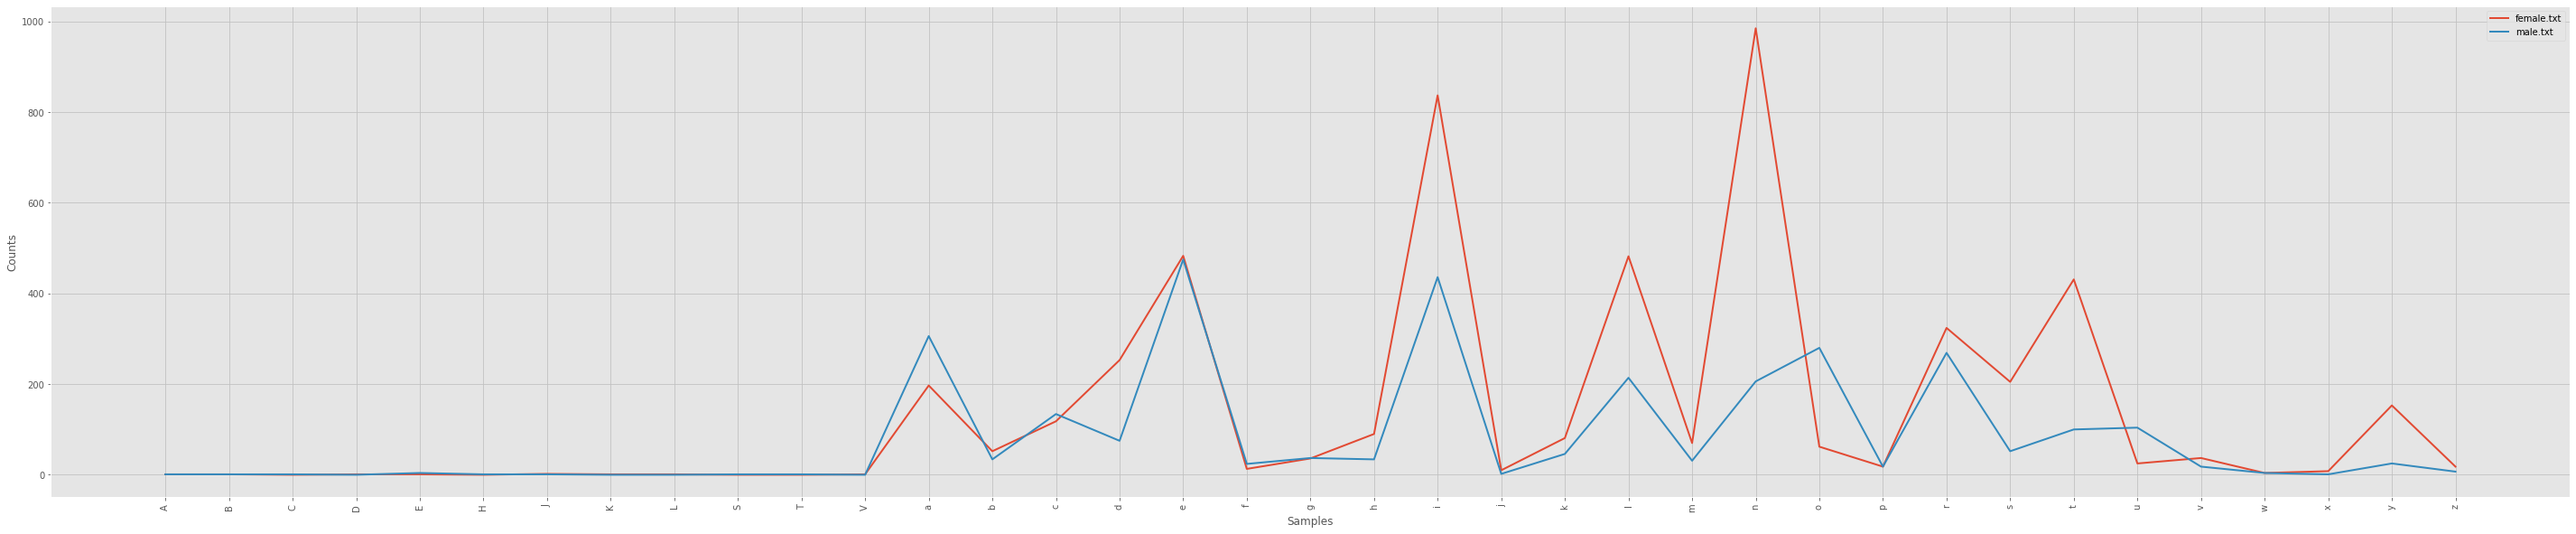

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [11]:
plt.figure(figsize=(50,10))
name_cfd.plot()

In [12]:
def name_features(name):
    return{"pair" : name[-2:]}

In [13]:
name_features("Katy")

{'pair': 'ty'}

In [14]:
name_list = [(name, "male")for name in names.words("male.txt")] + [(name, "female")for name in names.words("female.txt")]

In [15]:
name_list[:10]

[('Aamir', 'male'),
 ('Aaron', 'male'),
 ('Abbey', 'male'),
 ('Abbie', 'male'),
 ('Abbot', 'male'),
 ('Abbott', 'male'),
 ('Abby', 'male'),
 ('Abdel', 'male'),
 ('Abdul', 'male'),
 ('Abdulkarim', 'male')]

In [16]:
name_list[-10:]

[('Zonnya', 'female'),
 ('Zora', 'female'),
 ('Zorah', 'female'),
 ('Zorana', 'female'),
 ('Zorina', 'female'),
 ('Zorine', 'female'),
 ('Zsa Zsa', 'female'),
 ('Zsazsa', 'female'),
 ('Zulema', 'female'),
 ('Zuzana', 'female')]

In [17]:
random.shuffle(name_list)

In [18]:
name_list[:10]

[('Korie', 'female'),
 ('Tarra', 'female'),
 ('Dudley', 'male'),
 ('Timothee', 'male'),
 ('Karisa', 'female'),
 ('Butler', 'male'),
 ('Muffin', 'male'),
 ('Willa', 'female'),
 ('Charmaine', 'female'),
 ('Isador', 'male')]

In [19]:
features = [ (name_features(name), gender) for (name, gender) in name_list]

In [20]:
features[:10]

[({'pair': 'ie'}, 'female'),
 ({'pair': 'ra'}, 'female'),
 ({'pair': 'ey'}, 'male'),
 ({'pair': 'ee'}, 'male'),
 ({'pair': 'sa'}, 'female'),
 ({'pair': 'er'}, 'male'),
 ({'pair': 'in'}, 'male'),
 ({'pair': 'la'}, 'female'),
 ({'pair': 'ne'}, 'female'),
 ({'pair': 'or'}, 'male')]

In [21]:
len(features)/2

3972.0

In [22]:
training_set = features[:3972]
testing_set = features[3972:]

In [23]:
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [24]:
male_names = names.words("male.txt")

In [26]:
"Camillo" in male_names

False

In [27]:
classifier.classify(name_features("Camillo"))

'male'

In [28]:
nltk.classify.accuracy(classifier, testing_set)

0.7681268882175226